In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
df = pd.read_csv('Customers data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


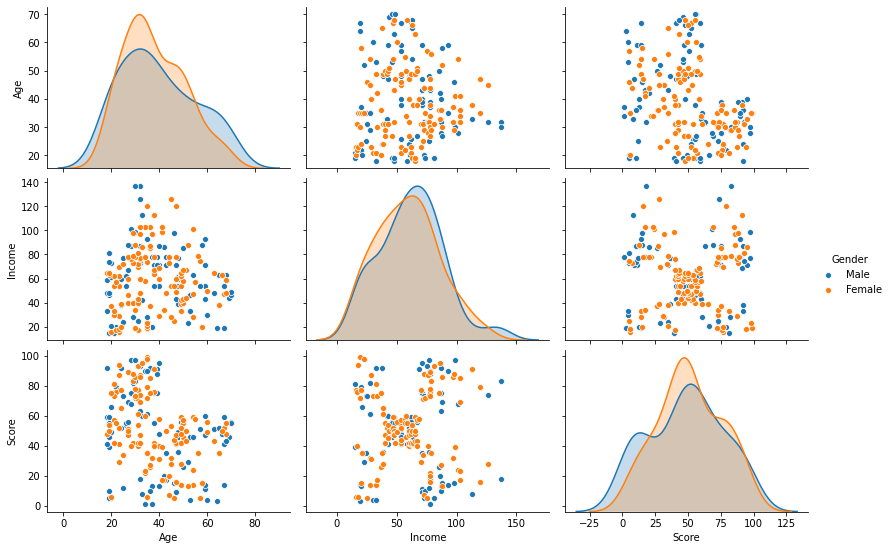

In [5]:
data = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

Text(0, 0.5, 'Inertia')

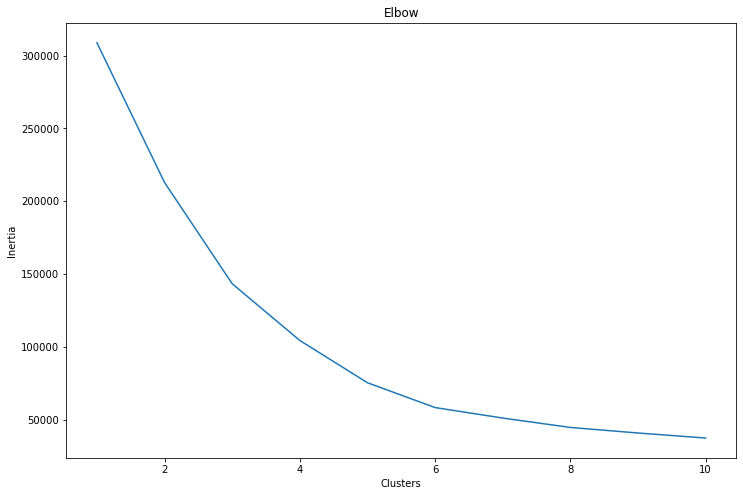

In [6]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


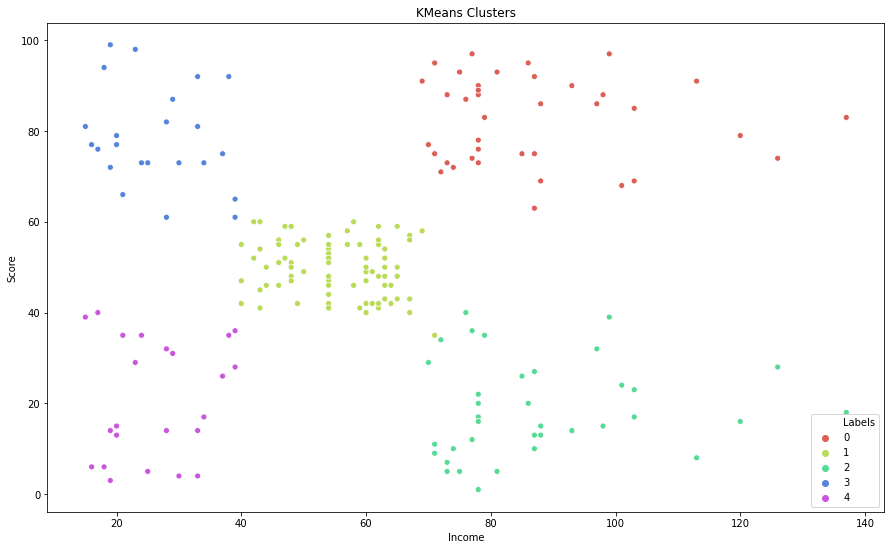

In [7]:
kmns = KMeans(n_clusters=5).fit(data)

data['Labels'] = kmns.labels_
plt.figure(figsize=(15, 9))
sns.scatterplot(data['Income'], data['Score'], hue=data['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans Clusters')
plt.show()

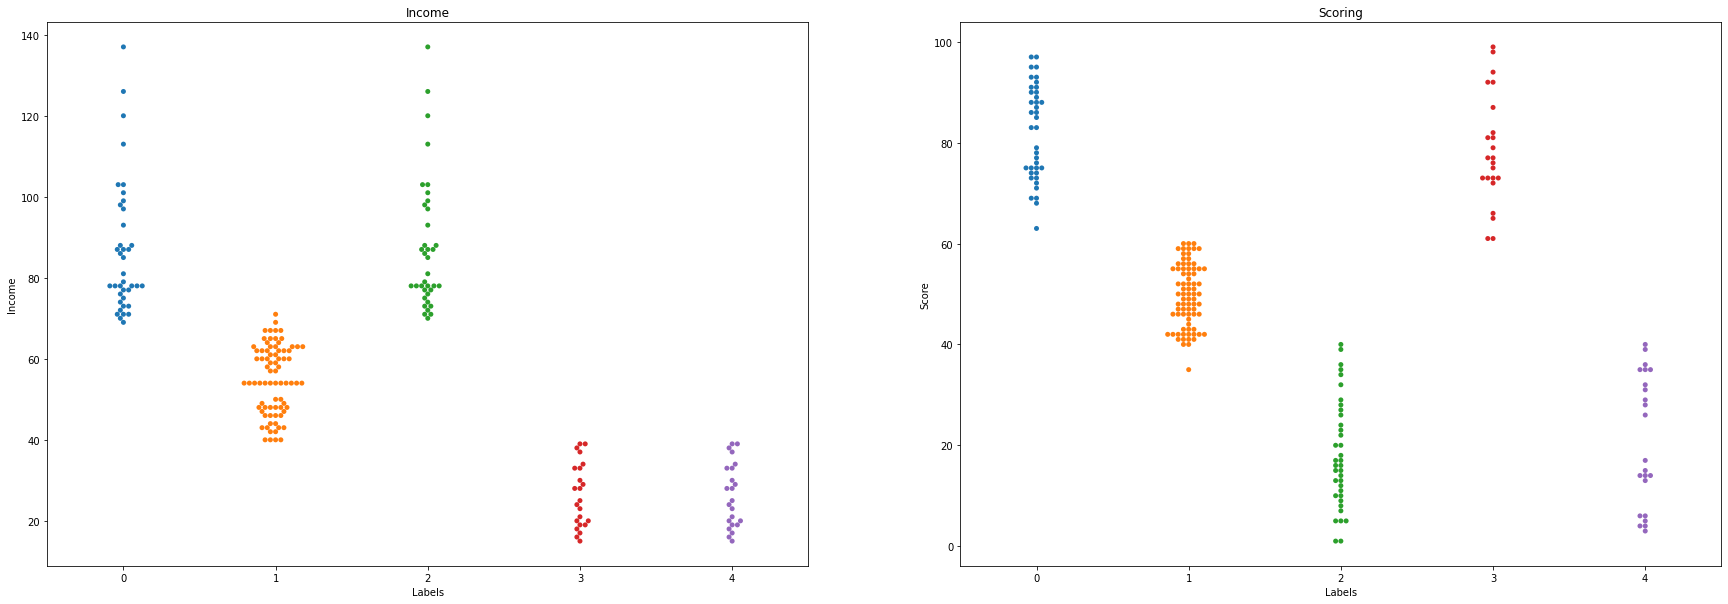

In [8]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=data, ax=ax)
ax.set_title('Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=data, ax=ax)
ax.set_title('Scoring')

plt.show()

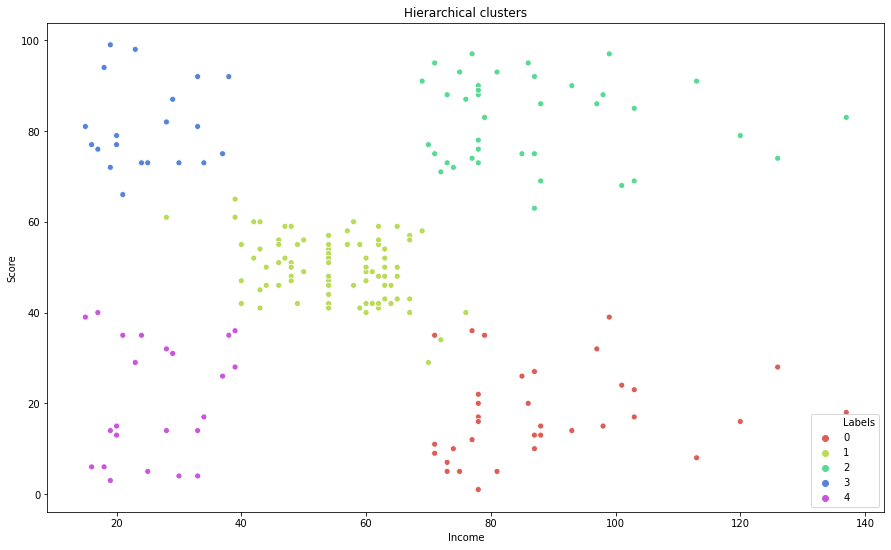

In [9]:
# Hierarchical clustering 
hclustering = AgglomerativeClustering(n_clusters=5, linkage='average').fit(data)

data['Labels'] = hclustering.labels_
plt.figure(figsize=(15, 9))
sns.scatterplot(data['Income'], data['Score'], hue=data['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Hierarchical clusters')
plt.show()

In [10]:
# Distance matrix
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(data, data)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


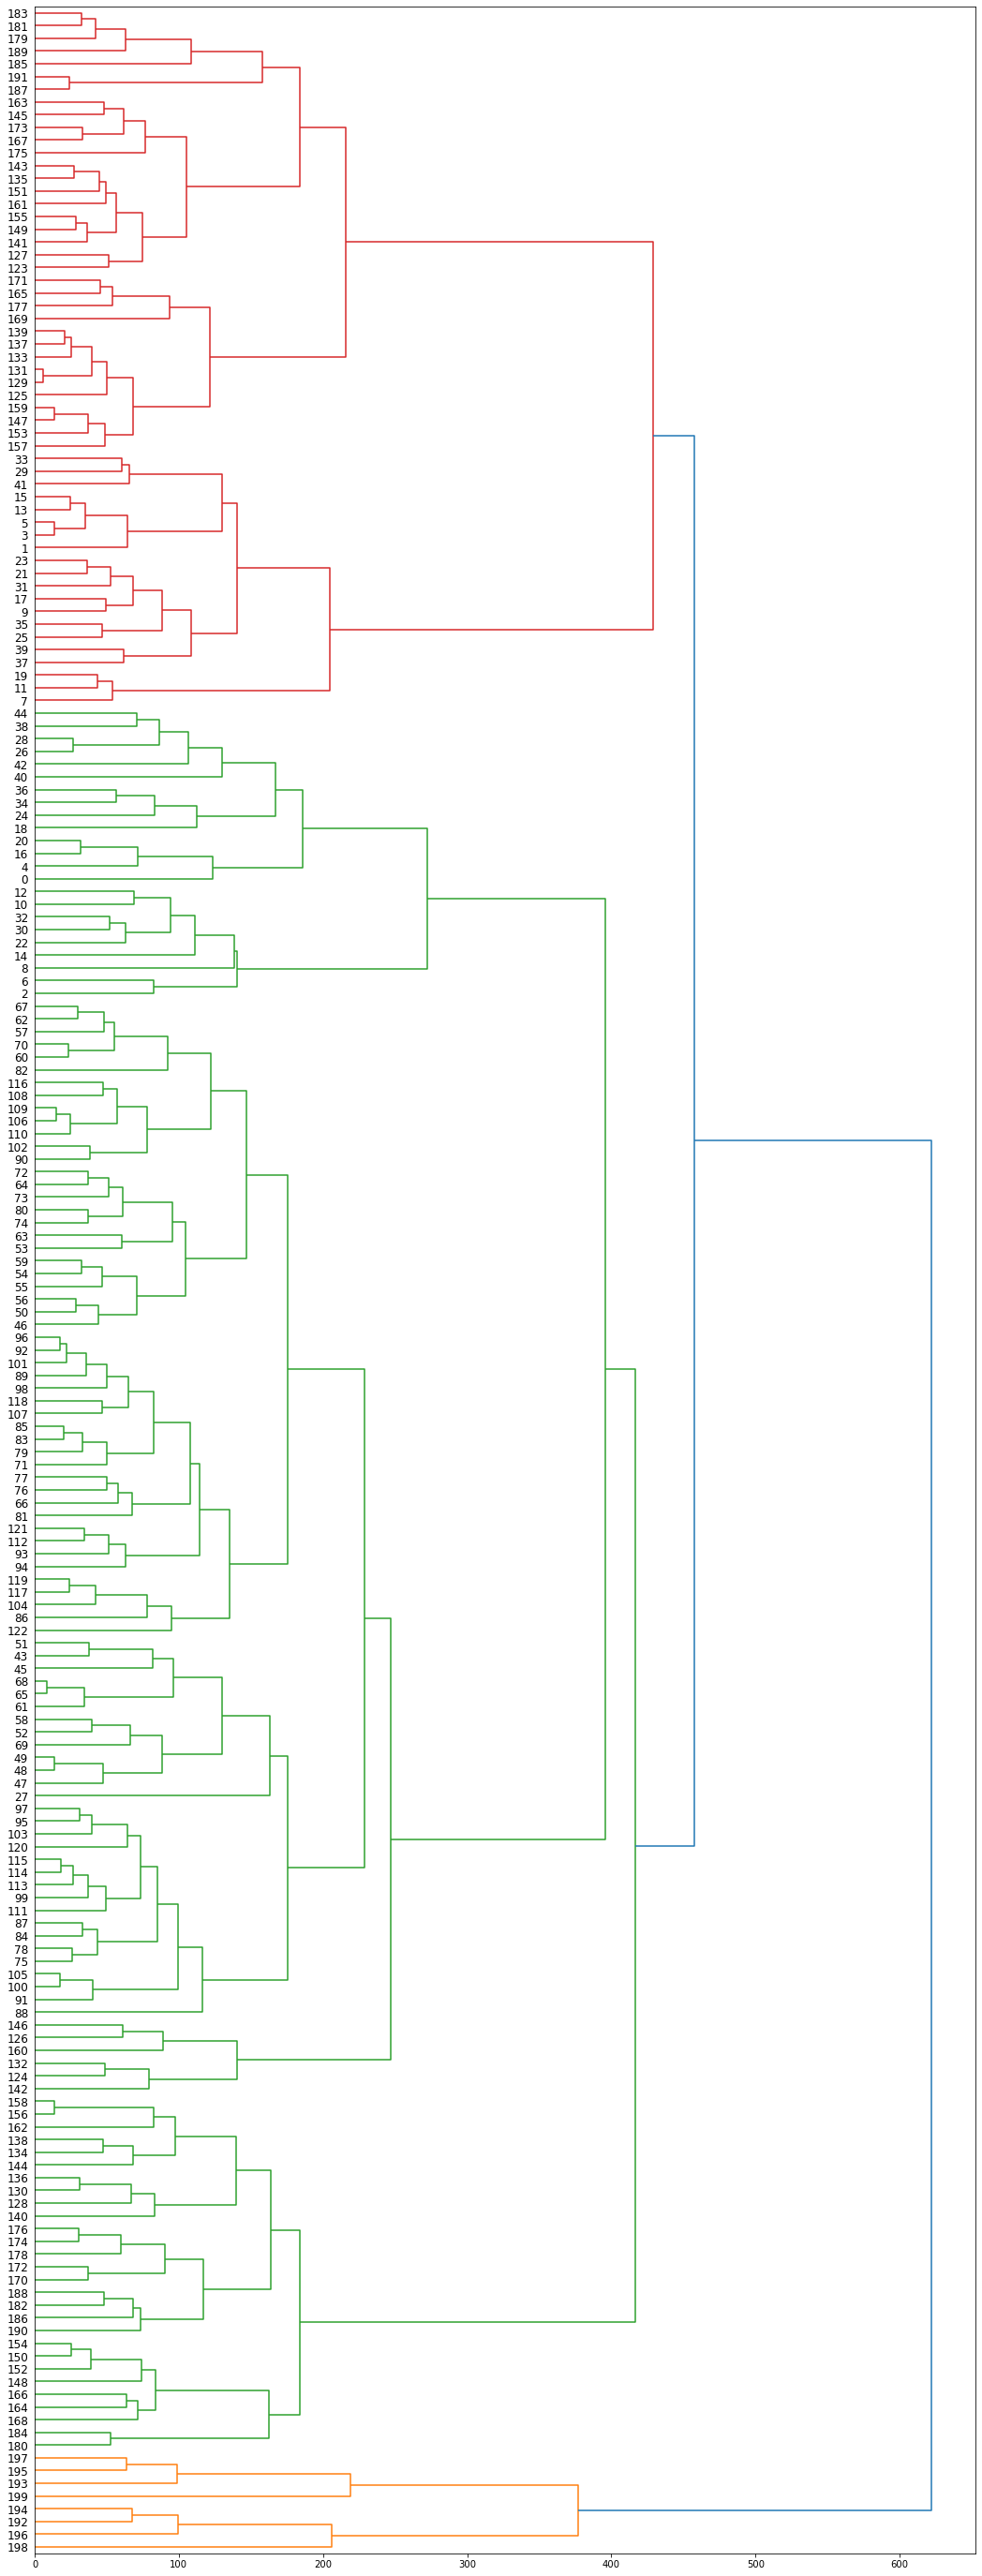

In [11]:
dendro = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
gram = hierarchy.dendrogram(dendro, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

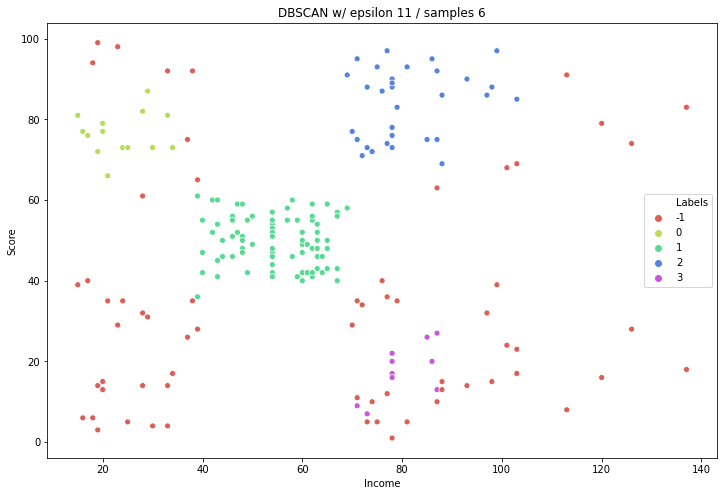

In [12]:
#DBSCAN
db = DBSCAN(eps=11, min_samples=6).fit(data)

data['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data['Income'], data['Score'], hue=data['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))

plt.title('DBSCAN w/ epsilon 11 / samples 6')
plt.show()

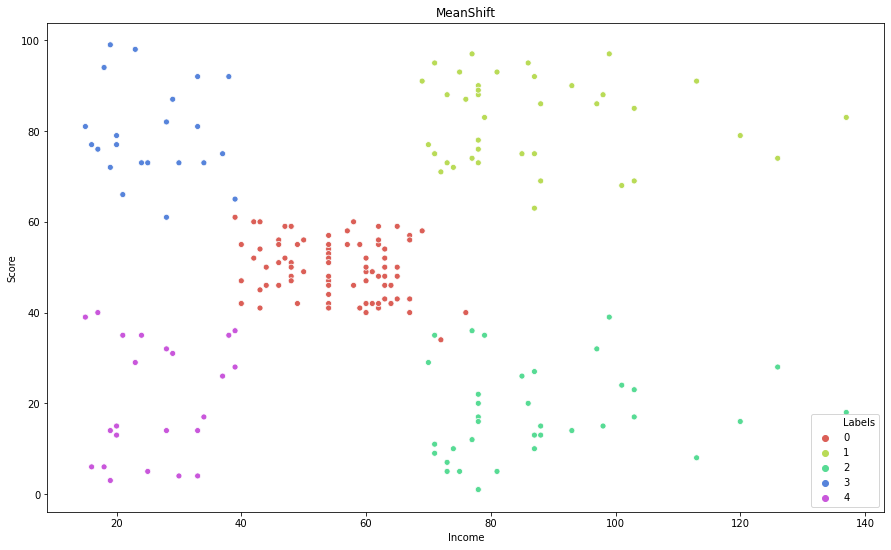

In [13]:
#  MeanShift
bandwidth = estimate_bandwidth(data, quantile=0.1)
ms = MeanShift(bandwidth).fit(data)

data['Labels'] = ms.labels_
plt.figure(figsize=(15, 9))
sns.scatterplot(data['Income'], data['Score'], hue=data['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

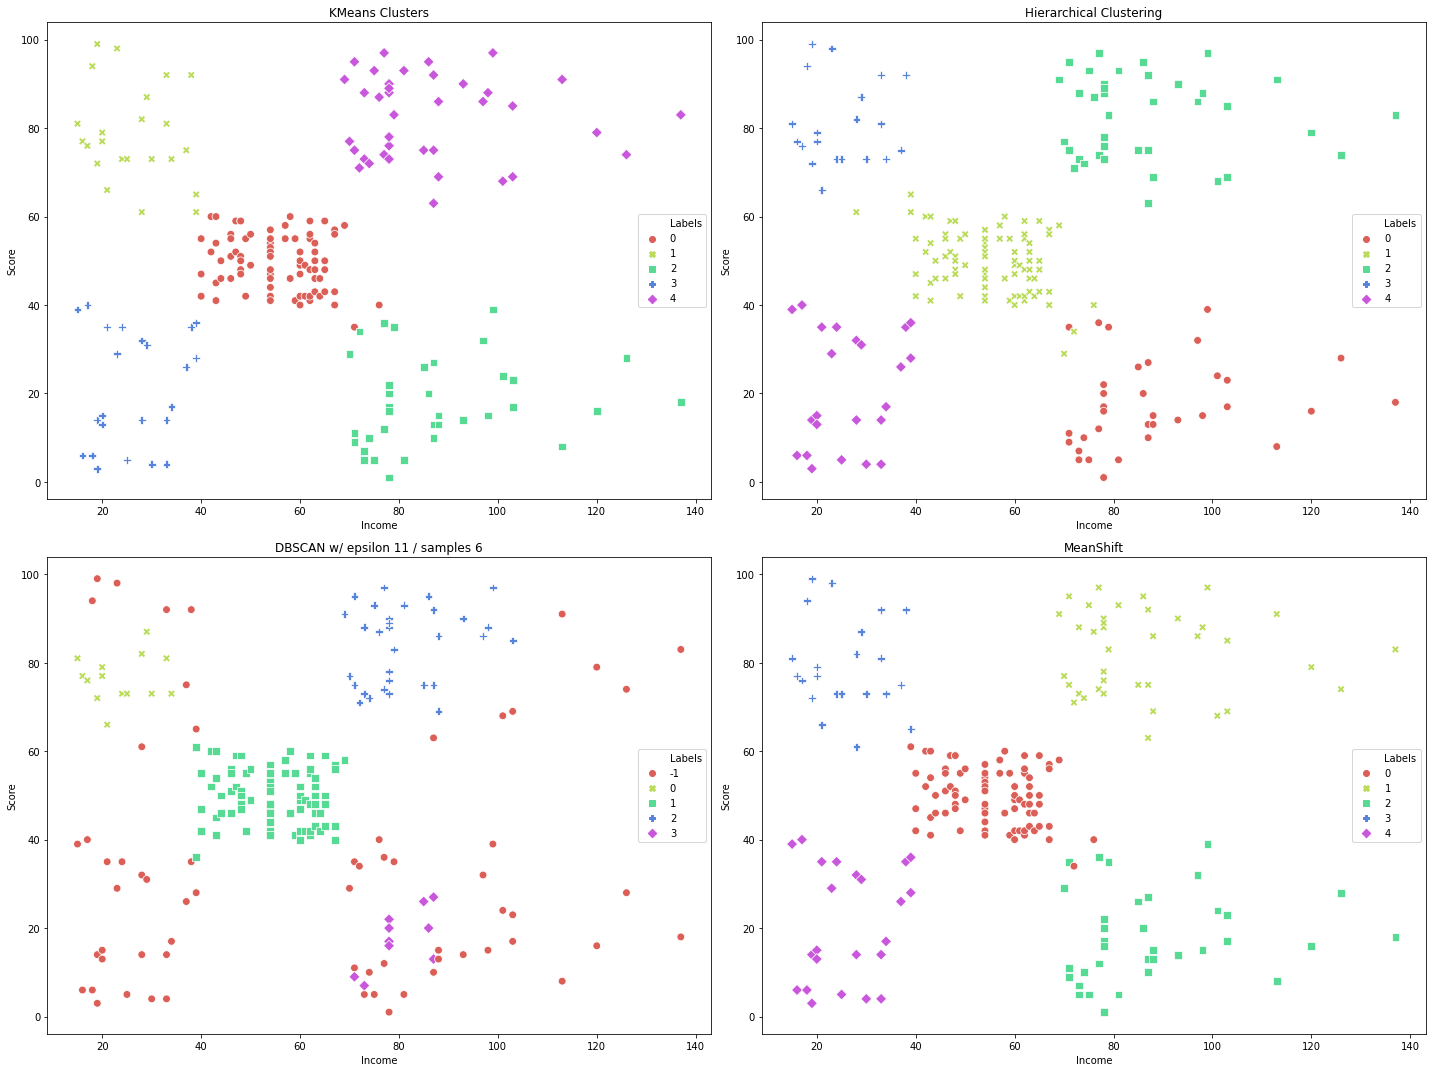

In [14]:
fig = plt.figure(figsize=(20,15))

# Kmeans
ax = fig.add_subplot(221)

kmns = KMeans(n_clusters=5).fit(data)
data['Labels'] = kmns.labels_
sns.scatterplot(data['Income'], data['Score'], hue=data['Labels'], style=data['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)

ax.set_title('KMeans Clusters')


# H. Clustering
ax = fig.add_subplot(222)

hclustering = AgglomerativeClustering(n_clusters=5, linkage='average').fit(data)
data['Labels'] = hclustering.labels_
sns.scatterplot(data['Income'], data['Score'], hue=data['Labels'], style=data['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)

ax.set_title('Hierarchical Clustering')


# DBSCAN
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(data)
data['Labels'] = db.labels_
sns.scatterplot(data['Income'], data['Score'], hue=data['Labels'], style=data['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN w/ epsilon 11 / samples 6')


# MeanShift
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(data, quantile=0.1)
ms = MeanShift(bandwidth).fit(data)
data['Labels'] = ms.labels_
sns.scatterplot(data['Income'], data['Score'], hue=data['Labels'], style=data['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)

ax.set_title('MeanShift')

plt.tight_layout()
plt.show()